In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
df = pd.read_csv('/content/pollutant-standards-index-jogja-2020.csv')
df.head(10)

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good
5,1/6/2020,12,2,97,18,0,97,CO,Moderate
6,1/7/2020,10,3,70,0,0,70,CO,Moderate
7,1/8/2020,11,4,87,0,0,87,CO,Moderate
8,1/9/2020,10,4,118,5,0,118,CO,Unhealthy
9,1/10/2020,10,3,73,30,0,73,CO,Moderate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                366 non-null    object
 1   PM10                366 non-null    int64 
 2   SO2                 366 non-null    int64 
 3   CO                  366 non-null    int64 
 4   O3                  366 non-null    int64 
 5   NO2                 366 non-null    int64 
 6   Max                 366 non-null    int64 
 7   Critical Component  366 non-null    object
 8   Category            366 non-null    object
dtypes: int64(6), object(3)
memory usage: 25.9+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
PM10,0
SO2,0
CO,0
O3,0
NO2,0
Max,0
Critical Component,0
Category,0


In [ ]:
df.describe()

,PM10,SO2,CO,O3,NO2,Max
count,366.000000,366.000000,366.000000,366.000000,366.0,366.000000
mean,19.699454,1.021858,31.161202,16.054645,0.0,35.800546
std,9.023704,1.012017,22.263521,14.172026,0.0,21.397890
min,3.000000,0.000000,0.000000,0.000000,0.0,11.000000
25%,14.000000,0.000000,18.000000,7.000000,0.0,21.000000
50%,18.500000,1.000000,23.500000,14.000000,0.0,28.000000
75%,23.000000,2.000000,40.000000,22.000000,0.0,45.000000
max,60.000000,6.000000,164.000000,81.000000,0.0,164.000000


In [ ]:
df.isna().sum()

,0
Date,0
PM10,0
SO2,0
CO,0
O3,0
NO2,0
Max,0
Critical Component,0
Category,0


pre

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

missing_values = df.isnull().sum()
df.info(), missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                366 non-null    datetime64[ns]
 1   PM10                366 non-null    int64         
 2   SO2                 366 non-null    int64         
 3   CO                  366 non-null    int64         
 4   O3                  366 non-null    int64         
 5   NO2                 366 non-null    int64         
 6   Max                 366 non-null    int64         
 7   Critical Component  366 non-null    object        
 8   Category            366 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 25.9+ KB


(None,
 Date                  0
 PM10                  0
 SO2                   0
 CO                    0
 O3                    0
 NO2                   0
 Max                   0
 Critical Component    0
 Category              0
 dtype: int64)

In [ ]:
df = df.drop(columns=['NO2'])

df.head()

,Date,PM10,SO2,CO,O3,Max,Critical Component,Category
0,2020-01-01,30,2,69,19,69,CO,Moderate
1,2020-01-02,16,2,58,33,58,CO,Moderate
2,2020-01-03,12,2,46,18,46,CO,Good
3,2020-01-04,8,2,84,29,84,CO,Moderate
4,2020-01-05,8,3,50,0,50,CO,Good


In [ ]:
label_encoder = LabelEncoder()

df['Category_numeric'] = label_encoder.fit_transform(df['Category'])

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df.head(), category_mapping

(        Date  PM10  SO2  CO  O3  Max Critical Component  Category  \
 0 2020-01-01    30    2  69  19   69                 CO  Moderate   
 1 2020-01-02    16    2  58  33   58                 CO  Moderate   
 2 2020-01-03    12    2  46  18   46                 CO      Good   
 3 2020-01-04     8    2  84  29   84                 CO  Moderate   
 4 2020-01-05     8    3  50   0   50                 CO      Good   
 
    Category_numeric  
 0                 1  
 1                 1  
 2                 0  
 3                 1  
 4                 0  ,
 {'Good': 0, 'Moderate': 1, 'Unhealthy': 2})

Exploratory Data Analysis

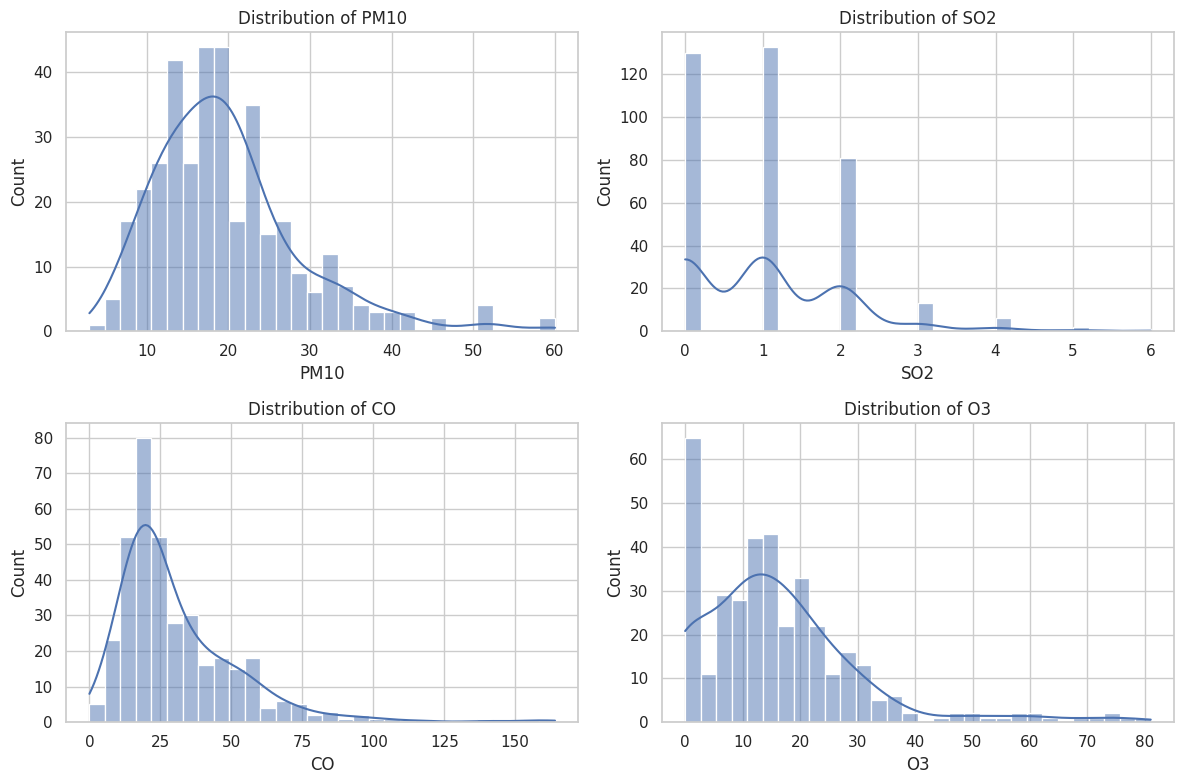

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
for i, column in enumerate(['PM10', 'SO2', 'CO', 'O3'], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

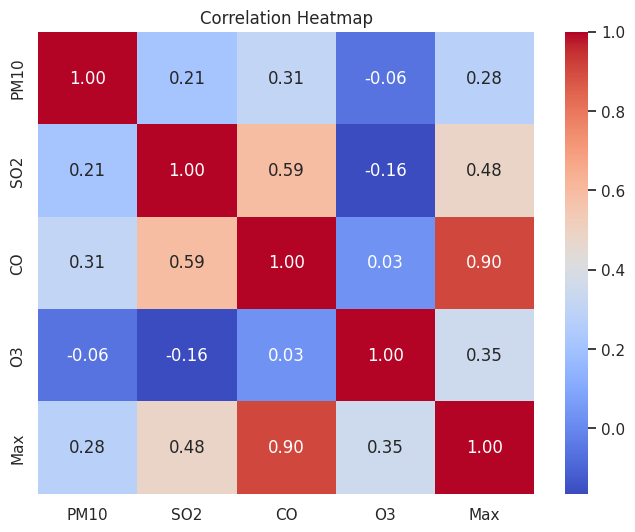

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['PM10', 'SO2', 'CO', 'O3', 'Max']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

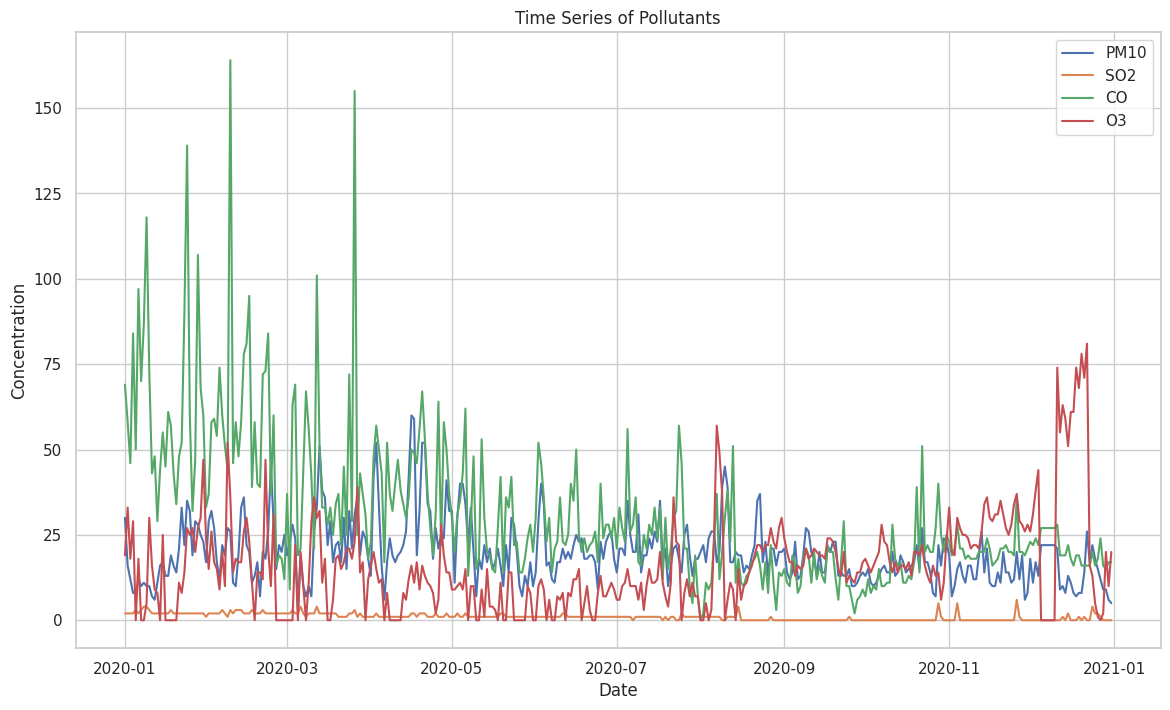

In [ ]:
plt.figure(figsize=(14, 8))
for column in ['PM10', 'SO2', 'CO', 'O3']:
    sns.lineplot(x='Date', y=column, data=df, label=column)
plt.title('Time Series of Pollutants')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [ ]:
df.head(10)

,Date,PM10,SO2,CO,O3,Max,Critical Component,Category,Category_numeric
0,2020-01-01,30,2,69,19,69,CO,Moderate,1
1,2020-01-02,16,2,58,33,58,CO,Moderate,1
2,2020-01-03,12,2,46,18,46,CO,Good,0
3,2020-01-04,8,2,84,29,84,CO,Moderate,1
4,2020-01-05,8,3,50,0,50,CO,Good,0
5,2020-01-06,12,2,97,18,97,CO,Moderate,1
6,2020-01-07,10,3,70,0,70,CO,Moderate,1
7,2020-01-08,11,4,87,0,87,CO,Moderate,1
8,2020-01-09,10,4,118,5,118,CO,Unhealthy,2
9,2020-01-10,10,3,73,30,73,CO,Moderate,1


In [ ]:
time_series_data = df[['Date', 'Max']].rename(columns={'Date': 'ds', 'Max': 'y'})

prophet_model = Prophet()

prophet_model.fit(time_series_data)

future = prophet_model.make_future_dataframe(periods=30)

forecast = prophet_model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyzwvto4l/yk2brcdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyzwvto4l/0tlx1ikx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43466', 'data', 'file=/tmp/tmpyzwvto4l/yk2brcdh.json', 'init=/tmp/tmpyzwvto4l/0tlx1ikx.json', 'output', 'file=/tmp/tmpyzwvto4l/prophet_modelm0uzy1bu/prophet_model-20250119132509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


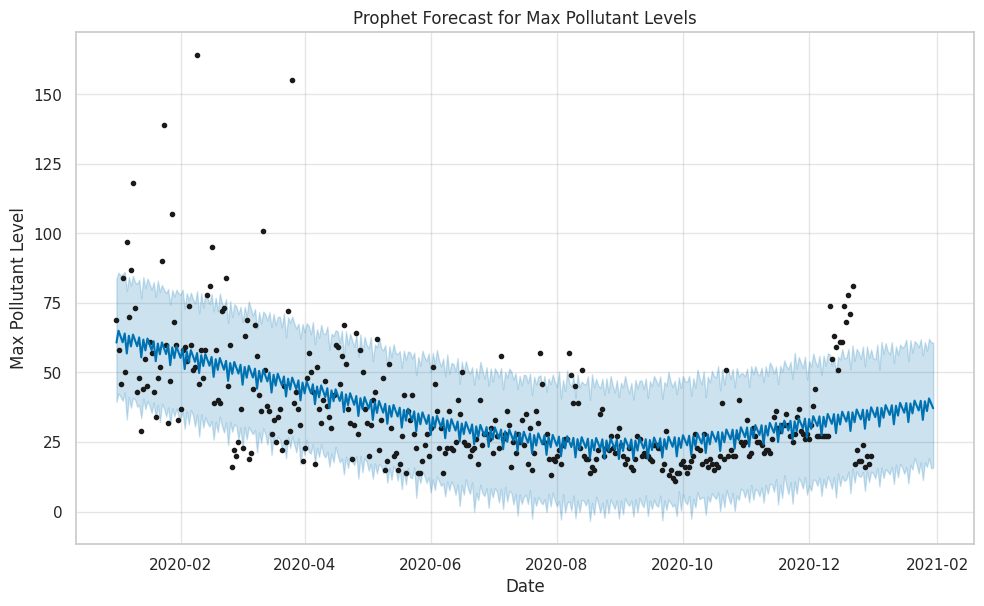

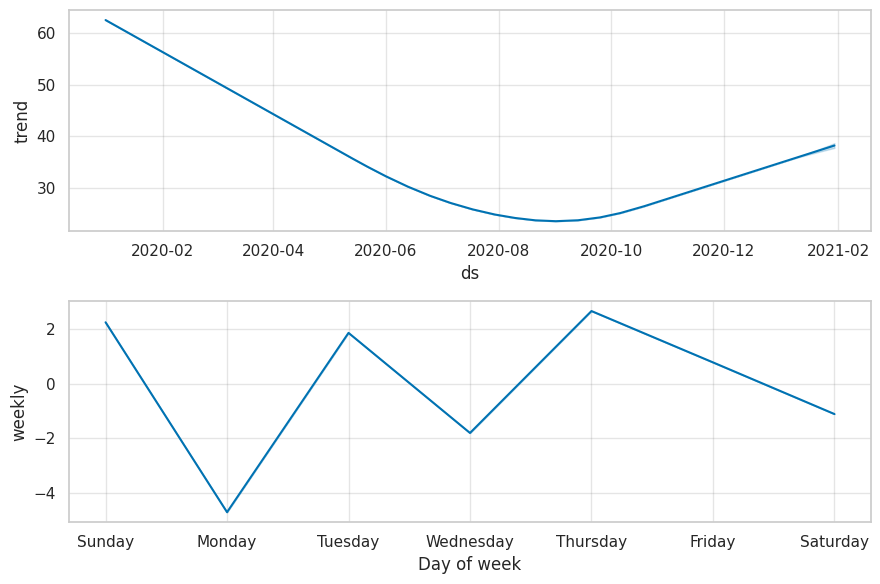

In [ ]:
fig = prophet_model.plot(forecast)
plt.title('Prophet Forecast for Max Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Max Pollutant Level')
plt.show()

fig2 = prophet_model.plot_components(forecast)
plt.show()

In [ ]:
df = pd.DataFrame({
    'Max': [69, 58, 46, 84, 50, 60],
    'Predicted_Max': [68, 60, 45, 85, 52, 59]
})

y_true = df['Max']
y_pred = df['Predicted_Max']

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)

results = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "Root Mean Squared Error (RMSE)": rmse
}
results

{'Mean Squared Error (MSE)': 2.0,
 'Mean Absolute Error (MAE)': 1.3333333333333333,
 'Root Mean Squared Error (RMSE)': 1.4142135623730951}

https://chatgpt.com/share/678ba556-45fc-8010-bd76-ed2cd44858ad